In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
labels = pd.read_csv('trainLabels.csv', header=True)

In [7]:
labels.head()

,circle0,0
0,circle1,0
1,circle2,0
2,circle3,0
3,circle4,0
4,circle5,0


In [4]:
data = pd.read_csv('layer2.csv', header=False)

In [6]:
data.head()

,5.667200088500976562e-01,7.970024645328521729e-02,2.027546428143978119e-02,2.690069973468780518e-01,1.842850148677825928e-01,2.951270341873168945e-01,1.841731136664748192e-03,4.442757666110992432e-01,3.289907574653625488e-01,2.179550230503082275e-01,...,9.691107869148254395e-01,9.359015151858329773e-03,1.865154504776000977e-02,1.093757271766662598e+00,6.872798316180706024e-03,5.407567620277404785e-01,3.315060734748840332e-01,1.024074077606201172e+00,3.251272141933441162e-01,7.077471613883972168e-01
0,0.359596,0.030360,0.042114,0.557201,0.292468,0.576244,0.040323,0.235649,0.360628,0.095723,...,0.973673,0.005746,0.189654,1.126736,0.018448,0.063515,0.795952,0.191133,0.985414,0.511179
1,0.384189,0.026059,0.013829,0.598136,0.185632,0.534398,0.062535,0.373995,0.421869,0.087321,...,0.974974,0.026356,0.253659,1.079788,0.021054,0.043340,0.797725,0.295483,0.835673,0.682395
2,0.616859,0.059887,0.021190,0.369321,0.141765,0.648689,0.008564,0.287725,0.474470,0.107217,...,1.012346,0.000000,0.100739,1.074590,0.006698,0.154095,0.485839,0.569061,0.434044,0.669629
3,0.531459,0.035479,0.030622,0.283461,0.167785,0.549207,0.000000,0.317763,0.365595,0.166181,...,0.925976,0.000000,0.021144,1.099319,0.022268,0.292321,0.480380,0.889247,0.325880,0.815859
4,0.680941,0.090619,0.000000,0.237210,0.148403,0.351544,0.003641,0.384987,0.401681,0.143233,...,0.953336,0.001316,0.013883,1.183898,0.011917,0.555546,0.251101,1.116223,0.196840,0.753510


In [8]:
from sklearn.manifold import TSNE
X = data.values
model = TSNE(n_components=2, random_state=0)
vals = model.fit_transform(X) 

In [9]:
vals.shape

(799, 2)

In [10]:
labels.values.shape

(799, 2)

In [12]:
forGraph = np.hstack([vals,labels])

In [13]:
header = ["x","y","name","class"]

In [15]:
forSns = pd.DataFrame(forGraph, columns = header)

In [28]:
rightBlob = forSns[forSns['y'] >-8]

In [29]:
rightBlob[rightBlob['class'] == 1]

,x,y,name,class
204,1.49786,-7.183717,cross5,1
259,2.383465,-6.620029,cross60,1
275,1.489795,-7.538162,cross76,1
316,-0.1864092,-6.578962,cross117,1
353,3.208965,-7.425173,cross154,1
355,-0.03169287,-7.425762,cross156,1


In [19]:
forSns.shape

(799, 4)

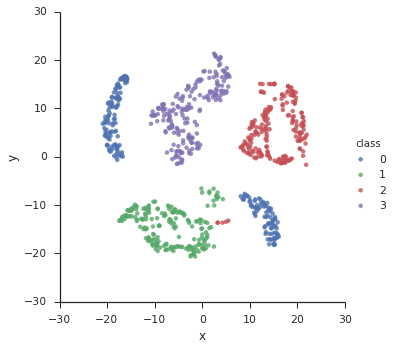

In [20]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('x', 'y',
           data=forSns,
           hue="class",fit_reg=False)

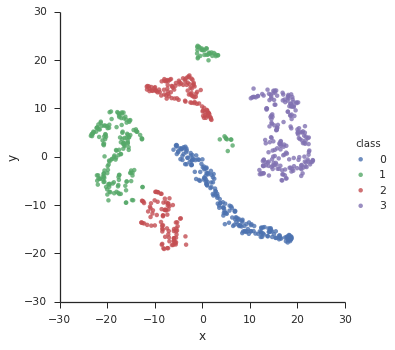

In [35]:
model2 = TSNE(n_components=2, random_state=1)
vals2 = model2.fit_transform(X) 
forGraph2 = np.hstack([vals2,labels])
forSns2 = pd.DataFrame(forGraph2, columns = header)
sns.lmplot('x', 'y',
           data=forSns2,
           hue="class",fit_reg=False)

In [37]:
blob = forSns2[forSns2['y'] >0]
blob[blob['class'] == 2]

,x,y,name,class
399,-2.056647,15.89713,square0,2
400,-4.813116,14.95008,square1,2
402,1.756608,8.049464,square3,2
403,-2.481747,14.25869,square4,2
404,-3.306489,16.29915,square5,2
405,0.5664254,9.20581,square6,2
407,0.1484442,9.563039,square8,2
408,-6.303011,14.5425,square9,2
412,-6.579982,16.04453,square13,2
415,-9.384882,13.29236,square16,2


In [38]:
X.shape

(799, 2048)